In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

In [123]:
def visualize_hammer(df,title="Candlestick Chart with Hammer Patterns"):
    # Detect Hammer candlestick patterns
    hammer_signals = candle_hammer(df)

    # Create a series of NaNs with the same length as df
    hammer_markers = pd.Series([float('nan')] * len(df), index=df.index)

    # Add a small offset to the Close price to move markers above the candle
    offset = 12

    # Mark Hammer positions with the close price + offset
    hammer_markers[hammer_signals] = df['Close'][hammer_signals] + offset

    # Visualize using mplfinance with markers for detected Hammer patterns
    mpf.plot(df, type='candle', style='charles', title=title, ylabel='Price', 
             addplot=mpf.make_addplot(hammer_markers, type='scatter', markersize=80, color='blue', marker='^'))

def candle_hammer(df):
    # Fill NaN values with 0
    df = df.fillna(0)

    return (
        ((df["High"] - df["Low"]) > 3 * (df["Open"] - df["Close"]))
        & (((df["Close"] - df["Low"]) / (0.001 + df["High"] - df["Low"])) > 0.6)
        & (((df["Open"] - df["Low"]) / (0.001 + df["High"] - df["Low"])) > 0.6)
    )


## Create chart with fictitious data

In [124]:
data = {
    'Date': pd.date_range('2024-12-01', periods=10, freq='D'),
    'Open': [100, 105, 110, 115, 108, 112, 116, 118, 122, 125],
    'High': [105, 110, 115, 118, 113, 116, 119, 121, 124, 128],
    'Low': [98, 103, 107, 112, 106, 110, 113, 116, 119, 120],
    'Close': [103, 107, 109, 115, 110, 114, 118, 119, 123, 126]
}

# # Adjust the values of the 3rd candle (index 2) to create a Bullish Hammer pattern
# Modify the data to make only the 3rd candle (index 2) a Bullish Hammer
data['Open'][2] = 108     # Small body for Bullish Hammer
data['Close'][2] = 109    # Small body for Bullish Hammer
data['Low'][2] = 100      # Long lower shadow
data['High'][2] = 110     # Small upper shadow

# Modify the other candles to have larger bodies
data['Open'][3] = 115     # Bullish candle with higher close
data['Close'][3] = 120    # Higher close than open
data['Low'][3] = 110      # Normal low
data['High'][3] = 125     # Normal high

data['Open'][4] = 120     # Bearish candle with lower close
data['Close'][4] = 118    # Lower close than open
data['Low'][4] = 115      # Normal low
data['High'][4] = 125     # Normal high

data['Open'][5] = 125     # Bearish candle with lower close
data['Close'][5] = 121    # Lower close than open
data['Low'][5] = 120      # Normal low
data['High'][5] = 130     # Normal high

data['Open'][6] = 130     # Bullish candle with higher close
data['Close'][6] = 134    # Higher close than open
data['Low'][6] = 125      # Normal low
data['High'][6] = 135     # Normal high

data['Open'][7] = 135     # Bullish candle with higher close
data['Close'][7] = 137    # Higher close than open
data['Low'][7] = 130      # Normal low
data['High'][7] = 140     # Normal high

data['Open'][8] = 140     # Bullish candle with higher close
data['Close'][8] = 141    # Higher close than open
data['Low'][8] = 135      # Normal low
data['High'][8] = 145     # Normal high

data['Open'][9] = 145     # Bullish candle with higher close
data['Close'][9] = 146    # Higher close than open
data['Low'][9] = 140      # Normal low
data['High'][9] = 150     # Normal high

# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

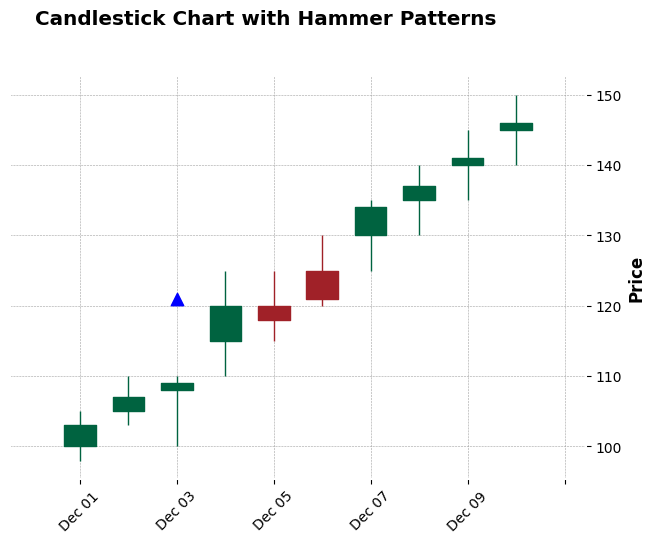

In [125]:
visualize_hammer(df)

In [126]:
candle_hammer(df)

Date
2024-12-01    False
2024-12-02    False
2024-12-03     True
2024-12-04    False
2024-12-05    False
2024-12-06    False
2024-12-07    False
2024-12-08    False
2024-12-09    False
2024-12-10    False
dtype: bool

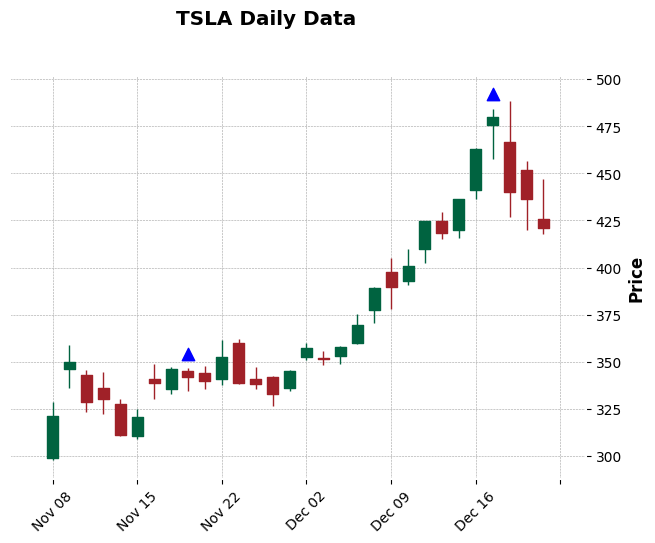

In [127]:
tesla_data = yf.download('TSLA', start='2024-01-01', end='2024-12-31', progress=False)
tesla_data = tesla_data.tail(30) # Last 30 Entries only
visualize_hammer(tesla_data,"TSLA Daily Data")

In [128]:
candle_hammer(tesla_data)

Date
2024-11-08    False
2024-11-11    False
2024-11-12    False
2024-11-13    False
2024-11-14    False
2024-11-15    False
2024-11-18    False
2024-11-19    False
2024-11-20     True
2024-11-21    False
2024-11-22    False
2024-11-25    False
2024-11-26    False
2024-11-27    False
2024-11-29    False
2024-12-02    False
2024-12-03    False
2024-12-04    False
2024-12-05    False
2024-12-06    False
2024-12-09    False
2024-12-10    False
2024-12-11    False
2024-12-12    False
2024-12-13    False
2024-12-16    False
2024-12-17     True
2024-12-18    False
2024-12-19    False
2024-12-20    False
dtype: bool